In [2]:
import pandas as pd
import numpy as np

In [3]:
from pylift import TransformedOutcome

In [4]:
df = pd.read_csv("../criteo_data/criteo-uplift-v2.1.csv")

# Look at data

In [5]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [6]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


# EDA

In [7]:
df['treatment'].value_counts(normalize=True)

1    0.85
0    0.15
Name: treatment, dtype: float64

In [8]:
df.groupby(by = "treatment").agg("mean")[["conversion","visit"]]

,conversion,visit
treatment,,
0,0.001938,0.038201
1,0.003089,0.048543


In [9]:
df.groupby(by = ["treatment","exposure"]).agg("mean")[["conversion","visit"]]

conversion     visit
treatment exposure                      
0         0           0.001938  0.038201
1         0           0.001194  0.034861
          1           0.053784  0.414538

# Sampling of data (5%)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# 1 percent of data
X_data = df.drop(columns = ["conversion"])
y_data = df[["conversion"]]
_, X_sample, _, y_sample = train_test_split(X_data, y_data, test_size = 0.05, random_state = 0, stratify = X_data[["treatment"]])

In [ ]:
X_sample.shape

In [ ]:
y_sample.shape

(698980, 1)

In [ ]:
X_sample.to_csv("../criteo_data/sampled_X.csv")
y_sample.to_csv("../criteo_data/sampled_y.csv")

In [5]:
X_sample = pd.read_csv("../criteo_data/sampled_X.csv")
y_sample = pd.read_csv("../criteo_data/sampled_y.csv")

In [6]:
small_df = pd.merge(left = X_sample, right = y_sample, left_index = True, right_index = True )

In [7]:
small_df

,Unnamed: 0_x,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,exposure,Unnamed: 0_y,conversion
0,3028168,22.478962,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,3028168,0
1,1889203,21.842794,10.059654,8.214383,4.679882,10.280525,4.115453,-3.282109,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,1889203,0
2,2536146,26.168970,10.059654,8.214383,4.679882,10.280525,4.115453,-9.864621,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,2536146,0
3,9491608,22.212511,10.059654,8.214383,4.679882,10.280525,4.115453,-9.404879,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,9491608,0
4,4931957,25.685535,10.059654,8.214383,4.679882,10.280525,4.115453,-7.011752,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,4931957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698975,12221019,21.295281,10.059654,8.214383,4.679882,10.280525,4.115453,-5.987667,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,12221019,0
698976,7297840,12.616365,10.059654,8.729708,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,7297840,0
698977,2061954,21.458890,10.059654,8.605658,4.679882,12.841576,3.013064,-7.822229,11.127637,3.775827,38.902612,6.065504,-0.168679,1,0,0,2061954,0
698978,2341211,26.535509,10.059654,8.214383,4.679882,10.280525,4.115453,-5.987667,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,2341211,0


In [8]:
small_df.shape

(698980, 18)

In [9]:
# Check the proportion of treatment vs control in smaller df
small_df["treatment"].value_counts(normalize = True)

1    0.85
0    0.15
Name: treatment, dtype: float64

# 1. Outcome = Conversion

In [28]:
up_conversion = TransformedOutcome(
    small_df.drop(columns = ["visit", "exposure"]), 
    col_treatment = 'treatment',
    col_outcome = "conversion",
    stratify = small_df['treatment']
)

In [29]:
up_conversion.randomized_search(n_iter = 10, n_jobs = -1, random_state = 0)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 39.6min finished


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      

In [31]:
# Fit best hyperparams
up_conversion.fit(**up_conversion.rand_search_.best_params_)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

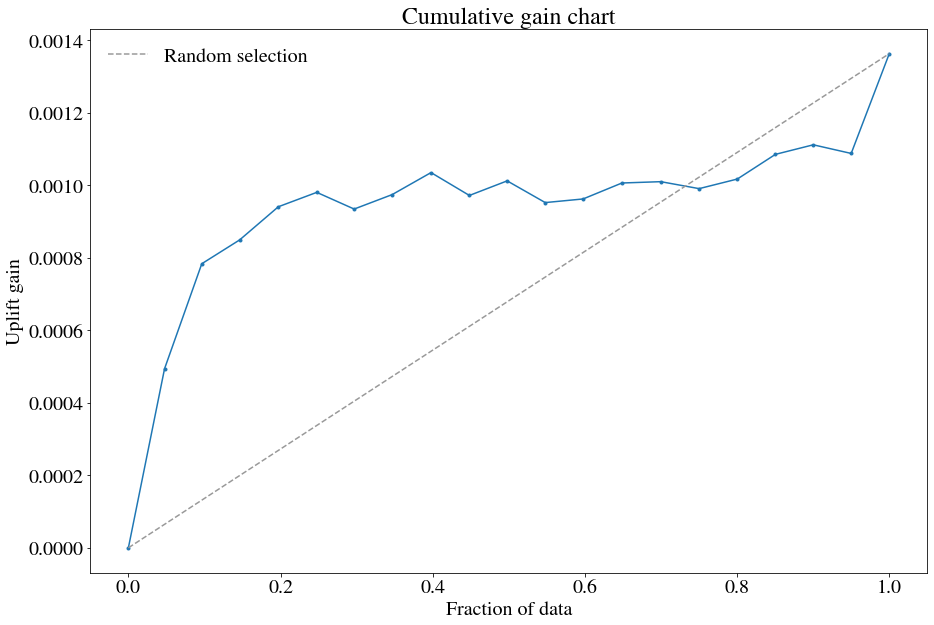

In [32]:
# Plot Gain curve
up_conversion.plot()

<AxesSubplot:title={'center':'Qini curve'}, xlabel='Fraction of data', ylabel='Uplift gain'>

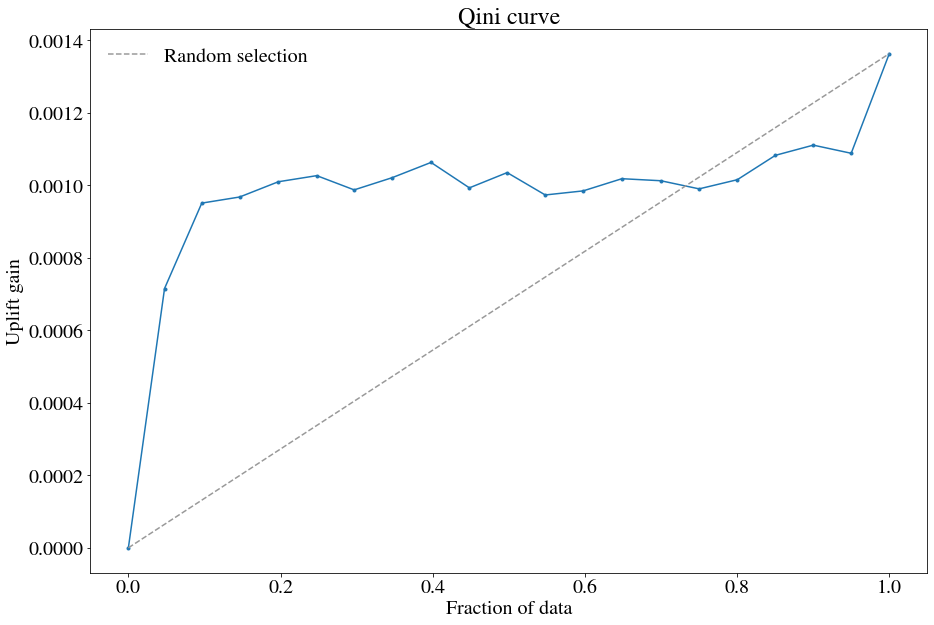

In [33]:
# Plot Qini Curve
up_conversion.plot(plot_type = "qini")

<AxesSubplot:title={'center':'Adjusted Qini curve'}, xlabel='Fraction of data', ylabel='Uplift gain'>

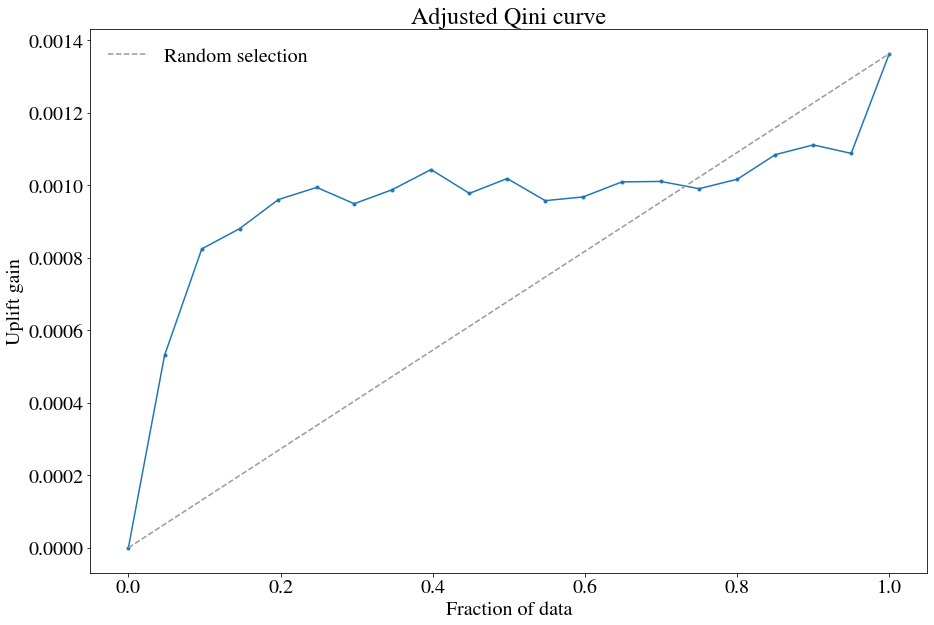

In [34]:
# Plot Adjusted qini curve
up_conversion.plot(plot_type = 'aqini')

# 2. Outcome = Visit

In [10]:
up_visit = TransformedOutcome(
    small_df.drop(columns = ["conversion", "exposure"]), 
    col_treatment = 'treatment',
    col_outcome = "visit",
    stratify = small_df['treatment']
)

In [11]:
up_visit.randomized_search(n_iter = 10, n_jobs = -1, random_state = 0)

up_visit.fit(**up_visit.rand_search_.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 70.9min finished


In [12]:
up_visit

In [13]:
dir(up_visit)

['NIV',
 'NWOE',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aqini_score',
 '_cgains_score',
 '_max_aqini_score',
 '_max_cgains_score',
 '_max_qini_score',
 '_qini_score',
 '_score',
 '_transform_func',
 '_untransform_func',
 'bayes_search',
 'bayes_search_params',
 'col_outcome',
 'col_transformed_outcome',
 'col_treatment',
 'df',
 'df_test',
 'df_train',
 'fit',
 'grid_search',
 'grid_search_params',
 'individual_policy_given',
 'model',
 'noise_fit',
 'p',
 'p_test',
 'p_train',
 'plot',
 'plot_aqini',
 'plot_balance',
 'plot_cgains',
 'plot_cuplift',
 'plot_qini',
 'plot_uplift',
 'rand_search_',
 'random_state',
 'randomized_search',
 'ran

In [19]:
up_visit.transformed_y_test_pred

array([ 0.00209679,  0.01892144,  0.00153528, ...,  0.00631753,
       -0.00482766, -0.12053515], dtype=float32)

In [17]:
up_visit.transformed_y_test

627038    0
471686    0
4464      0
26653     0
144035    0
         ..
438346   -0
120192    0
539135    0
125496    0
268893   -0
Name: TransformedOutcome, Length: 139796, dtype: object

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

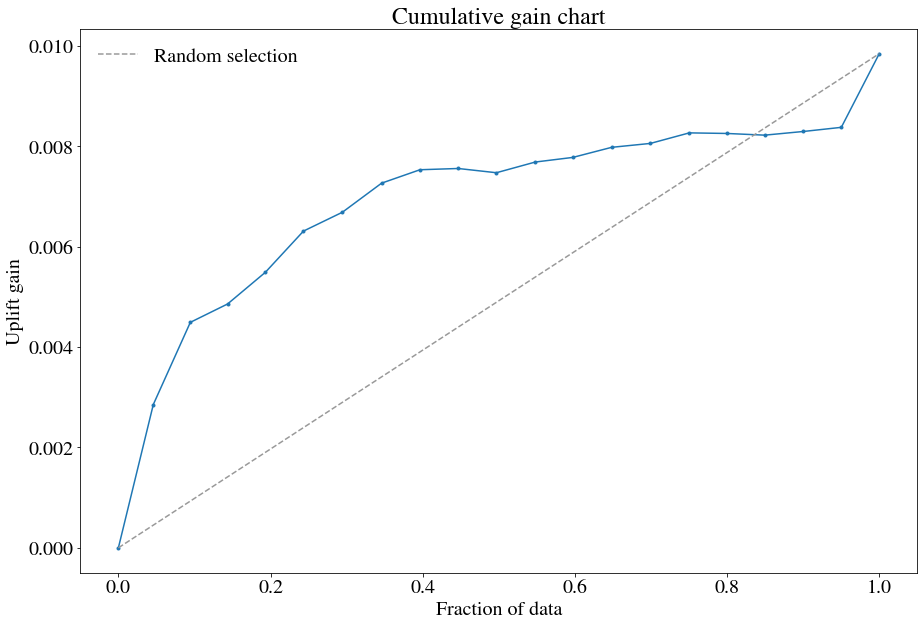

In [38]:
# Plot Gain curve
up_visit.plot()

<AxesSubplot:title={'center':'Qini curve'}, xlabel='Fraction of data', ylabel='Uplift gain'>

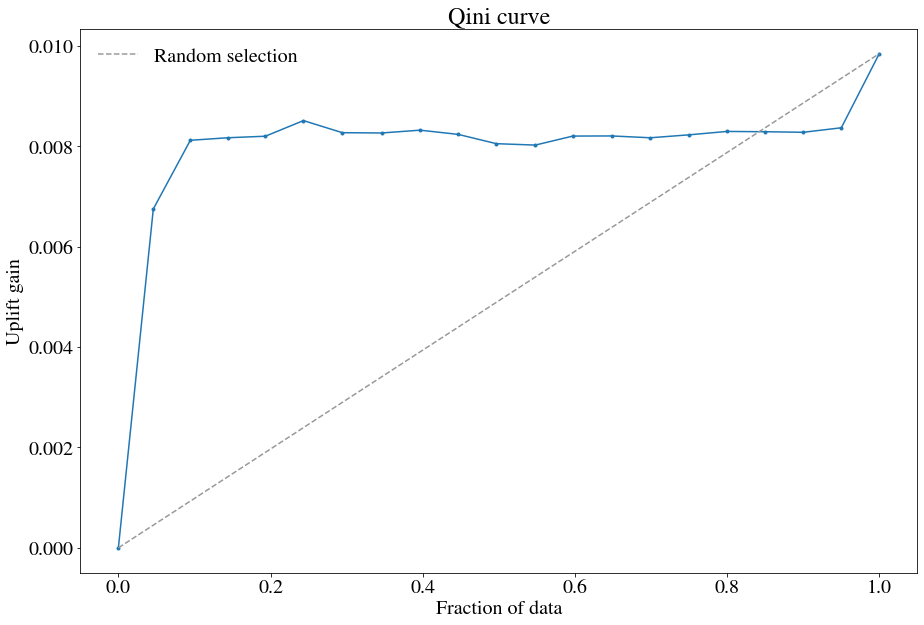

In [39]:
up_visit.plot(plot_type = "qini")

<AxesSubplot:title={'center':'Adjusted Qini curve'}, xlabel='Fraction of data', ylabel='Uplift gain'>

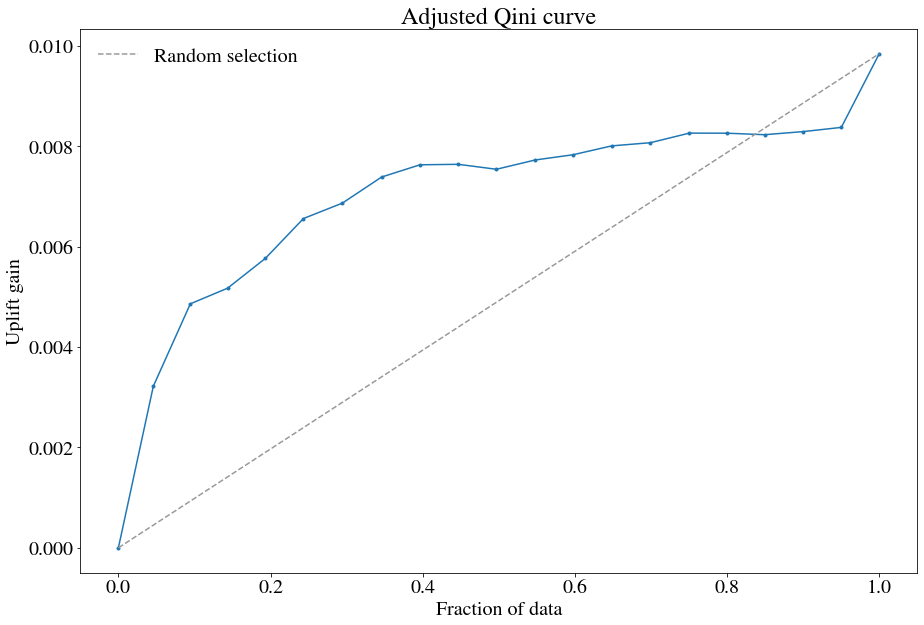

In [40]:
up_visit.plot(plot_type = "aqini")

# Save object to pkl

In [41]:
dir(up_conversion)

['NIV',
 'NWOE',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aqini_score',
 '_cgains_score',
 '_max_aqini_score',
 '_max_cgains_score',
 '_max_qini_score',
 '_qini_score',
 '_score',
 '_transform_func',
 '_untransform_func',
 'bayes_search',
 'bayes_search_params',
 'col_outcome',
 'col_transformed_outcome',
 'col_treatment',
 'df',
 'df_test',
 'df_train',
 'fit',
 'grid_search',
 'grid_search_params',
 'individual_policy_given',
 'model',
 'noise_fit',
 'p',
 'p_test',
 'p_train',
 'plot',
 'plot_aqini',
 'plot_balance',
 'plot_cgains',
 'plot_cuplift',
 'plot_qini',
 'plot_uplift',
 'rand_search_',
 'random_state',
 'randomized_search',
 'ran